In [ ]:
!pip install pydicom
import os
import collections
import ntpath
import pydicom
import pandas as pd
from tqdm.notebook import tqdm

"""
pandas_df_from_dicoms_folder:
params:
    folder: directory with dicom files
returns:
    pandas dataframe of the dicom files' data with filename as index
dataset_to_dic and data_element_to_dic from:
https://github.com/pydicom/contrib-pydicom/blob/master/plotting-visualization/dcm_qt_tree.py
pandas_df_from_dicoms_folder from:    
https://www.kaggle.com/code/quillio/fast-dicom-to-pandas-dataframe/notebook
"""

def data_element_to_dic(data_element):
    dic = collections.OrderedDict()
    if data_element.VR == "SQ":
        items = collections.OrderedDict()
        dic[data_element.name] = items
        i = 0
        for dataset_item in data_element:
            items['item ' + str(i)] = dataset_to_dic(dataset_item)
            i += 1
    elif data_element.name != 'Pixel Data':
        dic[data_element.name] = data_element.value
    return dic


def dataset_to_dic(dataset, index=None):
    dic = {}
    for data_element in dataset:
        dic.update(data_element_to_dic(data_element))
    if index is not None:
        dic.update({'index': index})
    return dic


def pandas_df_from_dicoms_folder(folder):
    dcm_files = [os.path.join(folder, f.name) for f in os.scandir(folder)]
    dcm_files = [x for x in dcm_files if x.endswith(('.dcm', '.dicom'))]
    
    pd_series_list = []
    for f in tqdm(dcm_files):
        dcm = pydicom.dcmread(f, stop_before_pixels=True)
        dic = dataset_to_dic(dcm, index=ntpath.basename(f))
        df = pd.Series(dic)
        pd_series_list.append(df)

    print('Done reading dicom data. Converting to dataframe...', end='')
    df = pd.concat([pd.DataFrame(x).T for x in pd_series_list])
    print('done.')
    df.index = df['index']
    df.index.name = None
    df = df.drop(columns=['index'])
    return df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [70]:
folder = '/content/drive/MyDrive/XR_CHESTPAT/XR_CHESTPAT/dicom_data_179_cases_anon/'
subfolders = ([ f.path for f in os.scandir(folder) if f.is_dir()])
subfolders.sort()

In [104]:
df_result = pd.DataFrame()
df_result.index.names = ['index']

In [105]:
for dicom_folder in subfolders: 
  df = pandas_df_from_dicoms_folder(dicom_folder)
  df.index = df.index.str.replace('.dcm$', '', regex=True)
  df_t = df.T
  df_t.index.names = ['index']
  df_result = pd.merge(df_result, df_t, how='outer', on='index')

  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


/usr/local/lib/python3.7/dist-packages/pydicom/valuerep.py:290: UserWarning: The value length (88) exceeds the maximum length of 64 allowed for VR LO.
  warnings.warn(msg)


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


/usr/local/lib/python3.7/dist-packages/pydicom/valuerep.py:290: UserWarning: The value length (66) exceeds the maximum length of 64 allowed for VR LO.
  warnings.warn(msg)


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/3 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/3 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/3 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


/usr/local/lib/python3.7/dist-packages/pydicom/valuerep.py:290: UserWarning: The value length (78) exceeds the maximum length of 64 allowed for VR LO.
  warnings.warn(msg)


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...

/usr/local/lib/python3.7/dist-packages/pydicom/valuerep.py:290: UserWarning: The value length (94) exceeds the maximum length of 64 allowed for VR LO.
  warnings.warn(msg)


done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


/usr/local/lib/python3.7/dist-packages/pydicom/valuerep.py:290: UserWarning: The value length (68) exceeds the maximum length of 64 allowed for VR LO.
  warnings.warn(msg)


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/3 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


/usr/local/lib/python3.7/dist-packages/pydicom/valuerep.py:290: UserWarning: The value length (70) exceeds the maximum length of 64 allowed for VR LO.
  warnings.warn(msg)


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/3 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:121: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  return op.get_result()


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/2 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


  0%|          | 0/1 [00:00<?, ?it/s]

Done reading dicom data. Converting to dataframe...done.


In [106]:
df_result

,2.25.219644760464561835559440660434666268491,2.25.77802121445226211256695467801427780864,2.25.116990345302191816095627115112644494523,2.25.296017420079134340381414144840862165453,2.25.92897579869386904415845136783159030968,2.25.218186668174220968093276140583979968665,2.25.100893164567420483488017174025855231028,2.25.312847366317640454363426712079531777143,2.25.110260844647857832736734472150431148133,2.25.167946543332780846712924690797430605790,...,2.25.148186665203291727562735641580382217947,2.25.214168273465310999173227247626731369709,2.25.272847260453696647043453900561488939079,2.25.118866423554553570625339271875377479388,2.25.77421970114354917317056594083835872052,2.25.36195346764903703870570087690920434172,2.25.106196194175075541728649439251501133429,2.25.298125161266263810387384327171876348588,2.25.35909892841473098539149689568558855726,2.25.45064536670377572997711894237936704532
index,,,,,,,,,,,,,,,,,,,,,
Specific Character Set,ISO_IR 192,ISO_IR 192,ISO_IR 192,ISO_IR 192,ISO_IR 192,ISO_IR 192,ISO_IR 192,ISO_IR 192,ISO_IR 192,ISO_IR 192,...,ISO_IR 192,ISO_IR 192,ISO_IR 192,ISO_IR 192,ISO_IR 192,ISO_IR 192,ISO_IR 192,ISO_IR 192,ISO_IR 192,ISO_IR 192
Image Type,"[DERIVED, PRIMARY, ]","[DERIVED, PRIMARY, ]","[DERIVED, PRIMARY, ]","[ORIGINAL, PRIMARY, ]","[ORIGINAL, PRIMARY, ]","[ORIGINAL, PRIMARY]","[ORIGINAL, PRIMARY]","[ORIGINAL, PRIMARY, ]","[DERIVED, PRIMARY]","[DERIVED, PRIMARY]",...,"[ORIGINAL, PRIMARY]","[ORIGINAL, PRIMARY]","[ORIGINAL, PRIMARY]","[ORIGINAL, PRIMARY]",NaN,NaN,"[DERIVED, PRIMARY]","[DERIVED, PRIMARY]","[DERIVED, PRIMARY]","[DERIVED, PRIMARY]"
SOP Class UID,1.2.840.10008.5.1.4.1.1.1.1,1.2.840.10008.5.1.4.1.1.1.1,1.2.840.10008.5.1.4.1.1.1.1,1.2.840.10008.5.1.4.1.1.1.1,1.2.840.10008.5.1.4.1.1.1,1.2.840.10008.5.1.4.1.1.1.1,1.2.840.10008.5.1.4.1.1.1.1,1.2.840.10008.5.1.4.1.1.1,1.2.840.10008.5.1.4.1.1.1.1,1.2.840.10008.5.1.4.1.1.1.1,...,1.2.840.10008.5.1.4.1.1.1.1,1.2.840.10008.5.1.4.1.1.1.1,1.2.840.10008.5.1.4.1.1.1.1,1.2.840.10008.5.1.4.1.1.1.1,1.2.840.10008.5.1.4.1.1.1.1.1,1.2.840.10008.5.1.4.1.1.1.1.1,1.2.840.10008.5.1.4.1.1.1,1.2.840.10008.5.1.4.1.1.1,1.2.840.10008.5.1.4.1.1.1,1.2.840.10008.5.1.4.1.1.1
SOP Instance UID,2.25.219644760464561835559440660434666268491,2.25.77802121445226211256695467801427780864,2.25.116990345302191816095627115112644494523,2.25.296017420079134340381414144840862165453,2.25.92897579869386904415845136783159030968,2.25.218186668174220968093276140583979968665,2.25.100893164567420483488017174025855231028,2.25.312847366317640454363426712079531777143,2.25.110260844647857832736734472150431148133,2.25.167946543332780846712924690797430605790,...,2.25.148186665203291727562735641580382217947,2.25.214168273465310999173227247626731369709,2.25.272847260453696647043453900561488939079,2.25.118866423554553570625339271875377479388,2.25.77421970114354917317056594083835872052,2.25.36195346764903703870570087690920434172,2.25.106196194175075541728649439251501133429,2.25.298125161266263810387384327171876348588,2.25.35909892841473098539149689568558855726,2.25.45064536670377572997711894237936704532
Study Date,00010101,00010101,00010101,00010101,00010101,00010101,00010101,00010101,00010101,00010101,...,00010101,00010101,00010101,00010101,00010101,00010101,00010101,00010101,00010101,00010101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Referenced Procedure Step Sequence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{},{},{},{},NaN,NaN,NaN,NaN,NaN,NaN
Number of Frames,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
Study Status ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,COMPLETED,COMPLETED,NaN,NaN,NaN,NaN


In [111]:
df_result.to_csv('/content/drive/MyDrive/XR_CHESTPAT/XR_CHESTPAT/out.csv') 

In [112]:
df_result_t = df_result.T

In [113]:
df_result_t.to_csv('/content/drive/MyDrive/XR_CHESTPAT/XR_CHESTPAT/out_T.csv') 

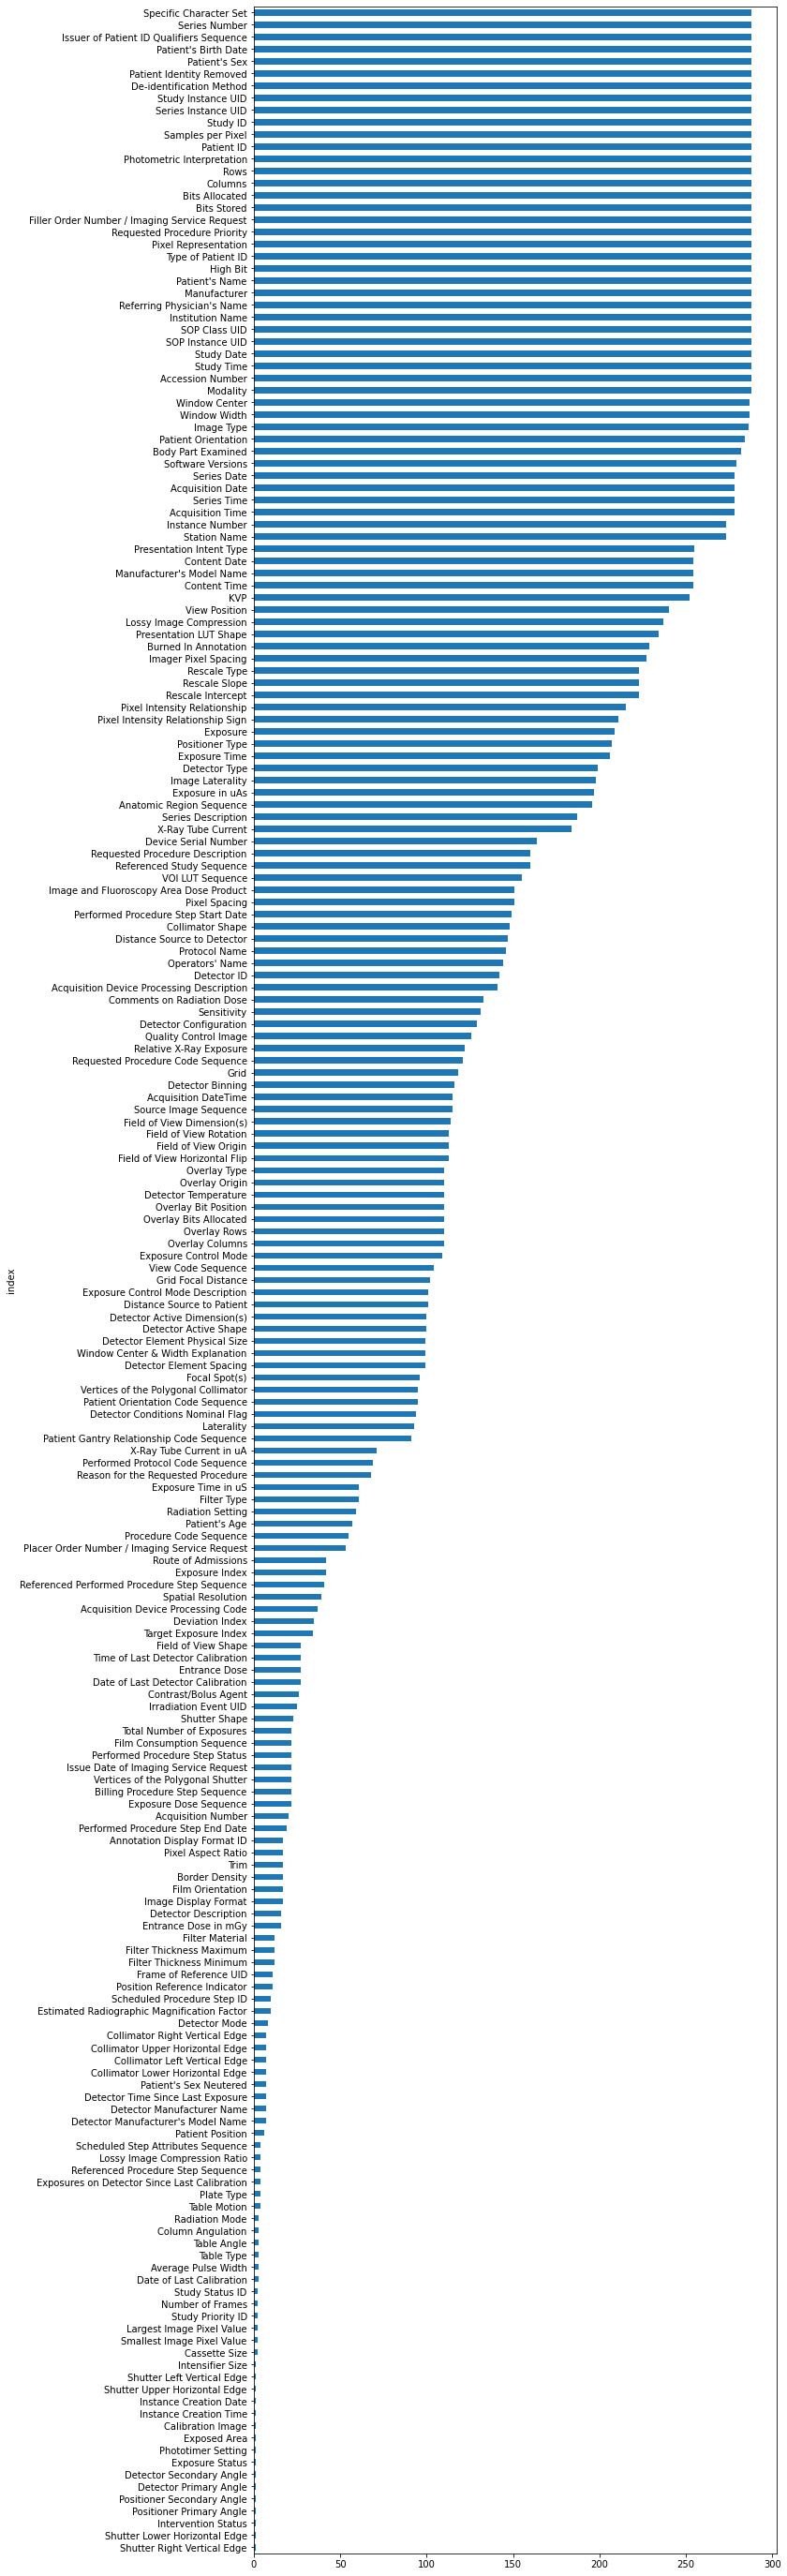

In [145]:
#df_result_t.describe(include = "all")

# Evaluating for Filling Data
df_result_t.notnull().sum().sort_values().plot(kind="barh", figsize=(10,50))